In [402]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import plotly
import numpy as np
import seaborn as sns
import calendar
import pandasql as pdsql

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from datacleaner import autoclean

from sklearn import metrics
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
import itertools

# Logistic Regression

This is an application of Logistic Regression for multiclassification of an unbalanced data set

data sets: Insight_Train_DC.csv, Insight_Test_DC.csv'

see Gradient Boosting (same folder) for an improvement

### Functions

In [403]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# data

In [399]:
df_train=pd.read_csv('Insight_Train_DC.csv')
df_train=pd.DataFrame(df_train)

# add zero to the null values
print(df_train.isnull().sum().sum())
df_train[df_train.isnull()==True]=0
print(df_train.isnull().sum().sum())

32
0


#### Autoclean

In [6]:
#autoclean(input_dataframe, drop_nans=False, copy=False, ignore_update_check=False)
#df_train2 = autoclean(df_train, copy=True )



In [401]:
print('non balanced: number of observations/class')
df_train.NSP.value_counts()

number of observations/class


1.0    1408
2.0     154
3.0     137
0.0       2
Name: NSP, dtype: int64

 ## Plot

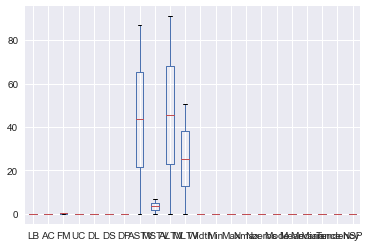

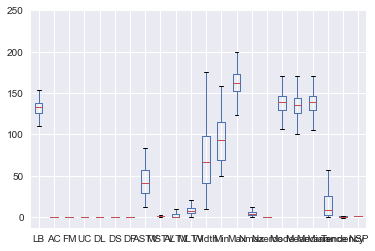

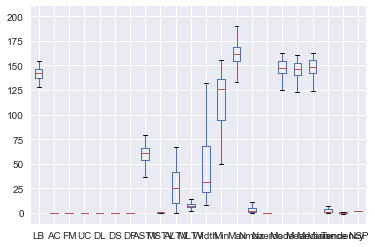

In [400]:
df_train[df_train.NSP==0].plot(kind='box')
df_train[df_train.NSP==1].plot(kind='box')
df_train[df_train.NSP==2].plot(kind='box')

## Training

In [404]:
m = df_train.shape[0]
n = df_train.shape[1] 
X = df_train.iloc[:,0:n-1]
Y = df_train.iloc[:,n-1]

Xtrain,Xtest, Ytrain,Ytest = train_test_split(X, Y, test_size = 0.3, random_state = 30)

0.937377690802
[  2.63111007e-05   9.99070665e-01   7.85334941e-04   1.17689130e-04]
             precision    recall  f1-score   support

          0       0.93      0.98      0.95       422
          1       0.68      0.34      0.45        50
          2       0.85      0.90      0.88        39

avg / total       0.90      0.91      0.90       511

Confusion matrix, without normalization
[[412   5   5]
 [ 32  17   1]
 [  1   3  35]]


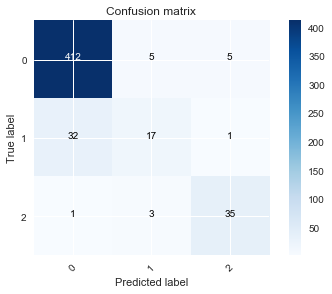

In [405]:
model = LogisticRegression()
model = model.fit(Xtrain, Ytrain)
Y_pred = model.predict(Xtest)


print(model_gb.score(Xtest, Ytest))
print(model_gb.predict_proba(Xtest)[0])
print(classification_report(Ytest,Y_pred, target_names=['0','1','2','3']))

cm = metrics.confusion_matrix(Ytest, Y_pred)
plot_confusion_matrix(cm, ['0','1','2'])


## Testing 

0.908665105386
[  2.63111007e-05   9.99070665e-01   7.85334941e-04   1.17689130e-04]
             precision    recall  f1-score   support

          0       0.71      0.99      0.83       247
          1       0.75      0.30      0.43       141
          2       0.62      0.38      0.48        39

avg / total       0.72      0.71      0.66       427

Confusion matrix, without normalization
[[245   0   2]
 [ 91  43   7]
 [ 10  14  15]]


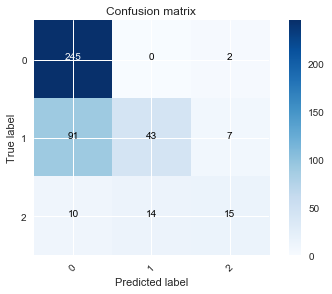

In [409]:
df_test=pd.read_csv('Insight_Test_DC.csv')
df_test=pd.DataFrame(df_test)

m = df_test.shape[0]
n = df_test.shape[1]

X = df_test.iloc[:,0:n-1]
Y = df_test.iloc[:,n-1]

Y_pred = model.predict(X)

print(model_gb.score(X, Y))
print(model_gb.predict_proba(Xtest)[0])
print(classification_report(Y,Y_pred, target_names=['0','1','2','3']))

cm = metrics.confusion_matrix(Y, Y_pred)
plot_confusion_matrix(cm, ['0','1','2'])


In [407]:
print(classification_report(Y,Y_pred, target_names=['0','1','2','3']))



             precision    recall  f1-score   support

          0       0.71      0.99      0.83       247
          1       0.75      0.30      0.43       141
          2       0.62      0.38      0.48        39

avg / total       0.72      0.71      0.66       427



## Feature importance

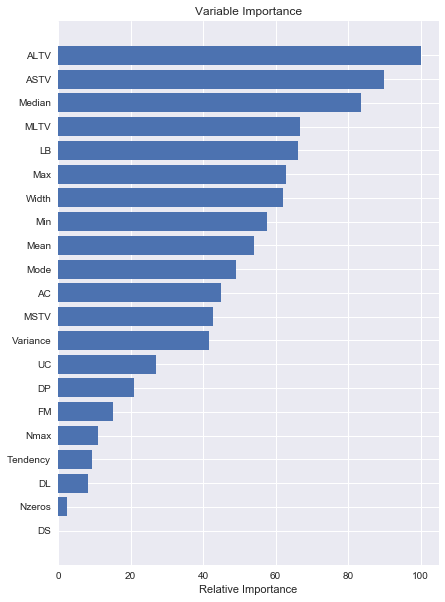

In [410]:
feature_importance = model_gb.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()